# Analysing the data of  users who shorten links ending with .gov or .mil. 

In this data analysis project, I followed the steps outlined in chapter 14 of the [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662)
book.

` Data sources`
---

In 2011, URL shortening service Bitly partnered with the US government website
USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. This is one of the preserved text files from that activity. 

The file contains web data called JSON 

In [1]:

import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
import sklearn as sk


In [2]:
!type "D:\MyLib.Doc\Programming.Doc\Python.allstuffs\Python for DataAnalysis\example.txt"

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }
{ "a": "GoogleMaps\/RochesterNY", "c": "US", "nk": 0, "tz": "America\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\/\/www.AwareMap.com\/", "u": "http:\/\/www.monroecounty.gov\/etc\/911\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }
{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoP

In [4]:
path = "D:\MyLib.Doc\Programming.Doc\Python.allstuffs\Python for DataAnalysis\example.txt"

In [5]:
#reading the first line of the file

open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

**Using python's third party libarary for converting JSON string to python dictionary object.**

In the code below, we import the library to do the convertion. Then, for every line in the JSON format data file we convert it to python dictionary. Finally, we print the first record.

In [6]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}


**Finding out the most frequent occuring time zones in the dataset**

we extract a list of time zones from very record that has a time zone field.  (the if condition handles the error that arises as some records lack a time zone fielD)

In [7]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10] #Accessing the first 10 time zones.

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [9]:
#the loop format of the list comprehension above.
timezones = []
for rec in records:
    if "tz" in rec:
        timezones.append(rec['tz'])

In [23]:
timezones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [21]:
#there exists 3440 time zone records 
len(time_zones)

3440



**This function will be used to produce counts by timezones.**
there exist two approaches to do the count
> Using a dictionary to store counts while we iterate through the timezones.
initialize an empty dictionary. For any record in the sequence, if its in the counts add one.

> Using python library defaultdict.


using a function allows for reusability.**

In [24]:
def get_count(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] = 1
        return counts

In [25]:
from collections import defaultdict

def get_count(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts
        
        

In [26]:
# Get the count of time zones and store them in a variable we call counts.
counts = get_count(time_zones)

In [27]:
#extracting how many records have New York timezone
counts['America/New_York']

1251

In [29]:
#every timezone and the number of times it occurs.
counts

defaultdict(int,
            {'America/New_York': 1251,
             'America/Denver': 191,
             'America/Sao_Paulo': 33,
             'Europe/Warsaw': 16,
             '': 521,
             'America/Los_Angeles': 382,
             'Asia/Hong_Kong': 10,
             'Europe/Rome': 27,
             'Africa/Ceuta': 2,
             'Europe/Madrid': 35,
             'Asia/Kuala_Lumpur': 3,
             'Asia/Nicosia': 1,
             'Europe/London': 74,
             'Pacific/Honolulu': 36,
             'America/Chicago': 400,
             'Europe/Malta': 2,
             'Europe/Lisbon': 8,
             'Europe/Paris': 14,
             'Europe/Copenhagen': 5,
             'America/Mazatlan': 1,
             'Europe/Dublin': 3,
             'Europe/Brussels': 4,
             'America/Vancouver': 12,
             'Europe/Amsterdam': 22,
             'Europe/Prague': 10,
             'Europe/Stockholm': 14,
             'America/Anchorage': 5,
             'Asia/Bangkok': 6,
         

**To get the top five timezones, we can use the function below.**

For every timezone and count in the dictionary, append them as a tuple in a list. Then sort them in ascending order and finally return the last five values.

In [30]:
def top_count(count_dict, n=5):
    value_key_pairs = [(count, tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [31]:
top_count(counts)

[(191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

**Using python's more advanced library**

Using Counter class we can do the timezone count much easier.

In [32]:
#using python standard library to find collections

from collections import Counter

In [33]:
counts = Counter(time_zones)

In [35]:
counts.most_common(5)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191)]

**Counting the time zones with pandas**

We create a dataframe for the records.

In [36]:
#creating a dataframe from the original records
frame =  pd.DataFrame(records)

In [37]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [87]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [38]:
#getting the last 10 time zones
frame['tz'][-10:]

3550       America/New_York
3551                       
3552        America/Chicago
3553       America/New_York
3554       America/New_York
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, dtype: object

In [39]:
#get the top five time zones
frame['tz'][:5]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [40]:
tz_counts = frame['tz'].value_counts()
type(tz_counts)

pandas.core.series.Series

In [41]:
#extracting the last 10 values
tz_counts[-10:]

America/Caracas          1
Asia/Kuching             1
Europe/Skopje            1
Asia/Pontianak           1
Asia/Novosibirsk         1
America/Santo_Domingo    1
America/La_Paz           1
America/Montevideo       1
America/Costa_Rica       1
America/Monterrey        1
Name: tz, dtype: int64

In [41]:
#extract the top 10 values
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

### Visualization
 
 Using matplotlib library
 
 

 We clean the timezone by substituting unknown value and missing time zone data in the records.
 using boolean array indexing for empty strings.
 

In [43]:
clean_tz = frame['tz'].fillna('missing')
type(clean_tz)

pandas.core.series.Series

In [45]:
len(clean_tz)

3560

In [50]:
len(time_zones)

3440

In [51]:
type(time_zones)

list

In [52]:
clean_tz[clean_tz == ' '] = 'unknown'

In [53]:
tz_counts = clean_tz.value_counts()
type(tz_counts)

pandas.core.series.Series

In [54]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

**Using seaborn package to make a horizontal bar plot**

Extract the top 10 timezone and create a barplot for that data.

In [57]:
subset = tz_counts[:10]
subset

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<AxesSubplot:>

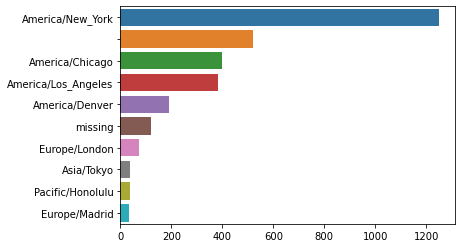

In [65]:
sns.barplot(y=subset.index, x=subset.values)

**using the information about the browser, device or application to perform URL shortening**

We use the data frame that contain all the records


In [70]:
frame['a'][50]


'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [71]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [72]:
len(frame.a)

3560

In [73]:
len(frame.a.dropna())

3440

**Split the first token in the string and make another summary of the user behavior.**

we create a pandas series that contains the browser capability.
The first token of the string corresponds to the browser capability

In [75]:

results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [76]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [77]:
#print the top 8 browsers 
#according to their frequency of appearance in the dataframe

results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

**Decomposing the top time zones into windows and non-windows users.**

We can do this by removing the data points missing agents('a') string information. Then we use where function in numpy to categorize this data into windows and non-windows users
 

In [88]:
cframe =frame[frame.a.notnull()]
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [79]:
cframe.index.name='col_list'

In [80]:
#compute whether each row is windows or not
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows','Not Windows')

<ipython-input-80-c0ab94f5417d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os'] = np.where(cframe['a'].str.contains('Windows'),


In [87]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

**Grouping the data by time zone column and os**

We create a variable that contains data grouped by timezone and operting sytem in use. We then use the size function to count the group and the unstack function ti reshape the data into tables finally will fill in the empty values with 0.


In [83]:
by_tz_os = cframe.groupby(['tz','os'])
by_tz_os

In [84]:
agg_count = by_tz_os.size().unstack().fillna(0)

In [123]:
agg_count[:50]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


**Finally**

We select the top overrall timezones.


In [95]:
indexer = agg_count.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [124]:
#take function will slice off the rows from the data.
count_subset = agg_count.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [125]:
#nlargest method will sort the data from largest to smallest.
agg_count.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

**plot a bar graph for these data**

We rearranged the data for plotting using the stack function. Then we create a new column called total. we reindex the data and finally print the top 10 rows.

With that done, we use seaborn to plot a bargraph

In [128]:

count_subset = count_subset.stack() 

In [130]:
count_subset.name = 'total'

In [131]:
count_subset = count_subset.reset_index()

In [132]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

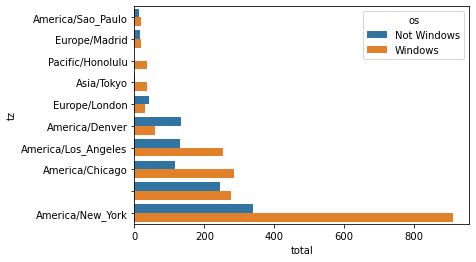

In [133]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

**To see the relative percentage of windows** users in the smaller groups is not possible with the plot above,

We normalize the group pecentages to a sum to 1

we create a function, that creates a new column - normed total that computes the average then return the group(the passed dataframe).
The average helps us to plot a plot that contains percentages of even the smallest values

In [137]:
def normalized_total(group):
    group['normed_total'] = group.total/ group.total.sum()
    return group

In [138]:
results = count_subset.groupby('tz').apply(normalized_total)

In [139]:
results

,tz,os,total,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,1.000000
6,Asia/Tokyo,Not Windows,2.0,0.054054
7,Asia/Tokyo,Windows,35.0,0.945946
8,Europe/London,Not Windows,43.0,0.581081
9,Europe/London,Windows,31.0,0.418919


<AxesSubplot:xlabel='normed_total', ylabel='tz'>

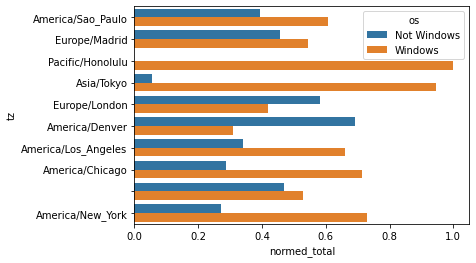

In [140]:
sns.barplot(x='normed_total', y='tz', hue = 'os', data=results)